In [1]:
! pip install mne 
# I know we said this is bad practice, but let's do it anyways so we don't have to open any terminal ;)
! pip install scikit-learn --user

import mne # Here we import mne, the package that will contain most of the function that we will use today.
from mne.datasets.brainstorm import bst_raw # It is possible to import functions individually. This is helpful since it 
                                            # saves time, memory, and makes the calls to the function easier.
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
%matplotlib notebook
# ^ This last line lets us use the interactive plots in Jupyter

In [16]:
PARTICIPANTS = ['01', '04', '05', '06', '07', '09', '11', '12', '13', '14']
event_id_names = [
            #'S1_p', 'S1_i',
            #'S2_p', 
            'S2_i', 
            'S3_p', 'S3_i',
            'S4_p', 'S4_i',
            'S11_p', 'S11_i',
            'S12_p', 'S12_i', 
            'S13_p', 'S13_i',
            'S14_p', 'S14_i',
            'S21_p', 'S21_i',
            'S22_p', 'S22_i', 
            'S23_p', 'S23_i',
            'S24_p', 'S24_i']
PERCEPT = [
            'S1_p', 
            'S2_p', 
            'S3_p',
            'S4_p', 
            'S11_p',
            'S12_p', 
            'S13_p',
            'S14_p',
            'S21_p',
            'S22_p', 
            'S23_p',
            'S24_p',]
IMAGINED = [
            'S1_i', 
            'S2_i', 
            'S3_i',
            'S4_i', 
            'S11_i',
            'S12_i', 
            'S13_i',
            'S14_i',
            'S21_i',
            'S22_i', 
            'S23_i',
            'S24_i',]

In [3]:
data_path = r'C:\Users\Dell\Jupyter\MNE_python'

epoched_data = {}
for p in PARTICIPANTS:
    
    fnames = (data_path + '\\' + 'epoched_data' + p +'.fif.gz')
    epoched_data[p] = mne.read_epochs(fnames, preload=True)

Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data01.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data01.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data04.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data04.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data05.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data05.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data06.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data06.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data07.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data07.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data09.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data09.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 66) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data11.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data11.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 66) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data12.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data12.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 66) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data13.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data13.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 66) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Dell\Jupyter\MNE_python\epoched_data14.fif.gz ...


<ipython-input-3-91a7f9014f9b>:7: RuntimeWarning: This filename (C:\Users\Dell\Jupyter\MNE_python\epoched_data14.fif.gz) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched_data[p] = mne.read_epochs(fnames, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 66) active
    Found the data of interest:
        t =    -500.00 ...    6800.78 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [54]:
##Keep only the 64 EEG electrodes
epoched_data['04'].get_data() = epoched_data['04'].get_data()[:, 0:65, :]

SyntaxError: can't assign to function call (<ipython-input-54-701cc757ca09>, line 1)

    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


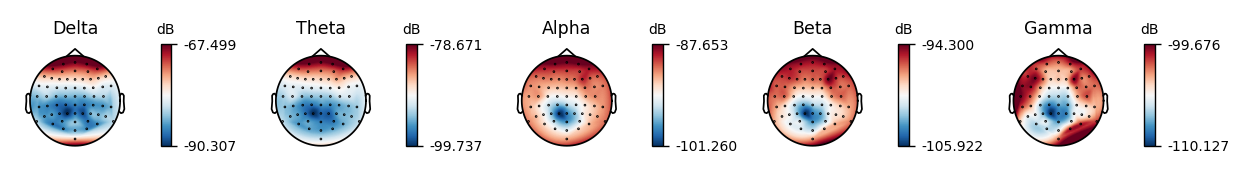

In [53]:
epoched_data['04'].plot_psd_topomap();

In [ ]:
ma_mat[0:5][0:64]['hurst']

In [6]:
cd = r'C:\Users\Dell\Jupyter\BrainHackSchool2019_AB'
import time
import numpy as np
import scipy.io as sio
#data = complex_test.get_data()

start = time.time()

#for p in PARTICIPANTS:
p = '01'
for c in event_id_names:
    cp = []
    meta_cp = []
    complex_data = epoched_data[p][c].get_data()
    for i in range(5): #data.shape(0):
        for j in range(64):
#i,j = 0, 0
            cp.append(complexity(complex_data[i,j,:], sampling_rate=epoched_data['01'].info['sfreq']))
        meta_cp.append(cp)
    #print(cp.shape())
    sio.savemat('{}_{}'.format(p, c), {'complexity': cp})
stop = time.time()
print(stop - start)


#cp.shape = (5,64) # UNE MATRICE PAR CHANSON/CONDITION/PARTICIPANT


#savemat('S%s_%s_%s.mat'.format(subj, cond, song), {'complexity': cp})

NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:465: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


29472.253475666046


In [5]:
import nolds
import numpy as np

# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity(signal, sampling_rate=1000, shannon=True, sampen=True, multiscale=True, spectral=True, svd=True, correlation=True, higushi=True, petrosian=True, fisher=True, hurst=True, dfa=True, lyap_r=False, lyap_e=False, emb_dim=2, tolerance="default", k_max=8, bands=None, tau=1):
    """
    Computes several chaos/complexity indices of a signal (including entropy, fractal dimensions, Hurst and Lyapunov exponent etc.).
    Parameters
    ----------
    signal : list or array
        List or array of values.
    sampling_rate : int
        Sampling rate (samples/second).
    shannon : bool
        Computes Shannon entropy.
    sampen : bool
        Computes approximate sample entropy (sampen) using Chebychev and Euclidean distances.
    multiscale : bool
        Computes multiscale entropy (MSE). Note that it uses the 'euclidean' distance.
    spectral : bool
        Computes Spectral Entropy.
    svd : bool
        Computes the Singular Value Decomposition (SVD) entropy.
    correlation : bool
        Computes the fractal (correlation) dimension.
    higushi : bool
        Computes the Higushi fractal dimension.
    petrosian : bool
        Computes the Petrosian fractal dimension.
    fisher : bool
        Computes the Fisher Information.
    hurst : bool
        Computes the Hurst exponent.
    dfa : bool
        Computes DFA.
    lyap_r : bool
        Computes Positive Lyapunov exponents (Rosenstein et al. (1993) method).
    lyap_e : bool
        Computes Positive Lyapunov exponents (Eckmann et al. (1986) method).
    emb_dim : int
        The embedding dimension (*m*, the length of vectors to compare). Used in sampen, fisher, svd and fractal_dim.
    tolerance : float
        Distance *r* threshold for two template vectors to be considered equal. Default is 0.2*std(signal). Used in sampen and fractal_dim.
    k_max : int
        The maximal value of k used for Higushi fractal dimension. The point at which the FD plateaus is considered a saturation point and that kmax value should be selected (Gómez, 2009). Some studies use a value of 8 or 16 for ECG signal and other 48 for MEG.
    bands : int
        Used for spectral density. A list of numbers delimiting the bins of the frequency bands. If None the entropy is computed over the whole range of the DFT (from 0 to `f_s/2`).
    tau : int
        The delay. Used for fisher, svd, lyap_e and lyap_r.
    Returns
    ----------
    complexity : dict
        Dict containing values for each indices.
    Example
    ----------
    >>> import neurokit as nk
    >>> import numpy as np
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> complexity = nk.complexity(signal)
    Notes
    ----------
    *Details*
    - **Entropy**: Entropy is a measure of unpredictability of the state, or equivalently, of its average information content.
      - *Shannon entropy*: Shannon entropy was introduced by Claude E. Shannon in his 1948 paper "A Mathematical Theory of Communication". Shannon entropy provides an absolute limit on the best possible average length of lossless encoding or compression of an information source.
      - *Sample entropy (sampen)*: Measures the complexity of a time-series, based on approximate entropy. The sample entropy of a time series is defined as the negative natural logarithm of the conditional probability that two sequences similar for emb_dim points remain similar at the next point, excluding self-matches. A lower value for the sample entropy therefore corresponds to a higher probability indicating more self-similarity.
      - *Multiscale entropy*: Multiscale entropy (MSE) analysis is a new method of measuring the complexity of finite length time series.
      - *SVD Entropy*: Indicator of how many vectors are needed for an adequate explanation of the data set. Measures feature-richness in the sense that the higher the entropy of the set of SVD weights, the more orthogonal vectors are required to adequately explain it.
    - **fractal dimension**: The term *fractal* was first introduced by Mandelbrot in 1983. A fractal is a set of points that when looked at smaller scales, resembles the whole set. The concept of fractak dimension (FD) originates from fractal geometry. In traditional geometry, the topological or Euclidean dimension of an object is known as the number of directions each differential of the object occupies in space. This definition of dimension works well for geometrical objects whose level of detail, complexity or *space-filling* is the same. However, when considering two fractals of the same topological dimension, their level of *space-filling* is different, and that information is not given by the topological dimension. The FD emerges to provide a measure of how much space an object occupies between Euclidean dimensions. The FD of a waveform represents a powerful tool for transient detection. This feature has been used in the analysis of ECG and EEG to identify and distinguish specific states of physiologic function. Many algorithms are available to determine the FD of the waveform (Acharya, 2005).
      - *Correlation*: A measure of the fractal (or correlation) dimension of a time series which is also related to complexity. The correlation dimension is a characteristic measure that can be used to describe the geometry of chaotic attractors. It is defined using the correlation sum C(r) which is the fraction of pairs of points X_i in the phase space whose distance is smaller than r.
      - *Higushi*: Higuchi proposed in 1988 an efficient algorithm for measuring the FD of discrete time sequences. As the reconstruction of the attractor phase space is not necessary, this algorithm is simpler and faster than D2 and other classical measures derived from chaos theory. FD can be used to quantify the complexity and self-similarity of a signal. HFD has already been used to analyse the complexity of brain recordings and other biological signals.
      - *Petrosian Fractal Dimension*: Provide a fast computation of the FD of a signal by translating the series into a binary sequence.
    - **Other**:
      - *Fisher Information*:  A way of measuring the amount of information that an observable random variable X carries about an unknown parameter θ of a distribution that models X. Formally, it is the variance of the score, or the expected value of the observed information.
      - *Hurst*: The Hurst exponent is a measure of the "long-term memory" of a time series. It can be used to determine whether the time series is more, less, or equally likely to increase if it has increased in previous steps. This property makes the Hurst exponent especially interesting for the analysis of stock data.
      - *DFA*: DFA measures the Hurst parameter H, which is very similar to the Hurst exponent. The main difference is that DFA can be used for non-stationary processes (whose mean and/or variance change over time).
      - *Lyap*: Positive Lyapunov exponents indicate chaos and unpredictability. Provides the algorithm of Rosenstein et al. (1993) to estimate the largest Lyapunov exponent and the algorithm of Eckmann et al. (1986) to estimate the whole spectrum of Lyapunov exponents.
    *Authors*
    - Dominique Makowski (https://github.com/DominiqueMakowski)
    - Christopher Schölzel (https://github.com/CSchoel)
    - tjugo (https://github.com/nikdon)
    - Quentin Geissmann (https://github.com/qgeissmann)
    *Dependencies*
    - nolds
    - numpy
    *See Also*
    - nolds package: https://github.com/CSchoel/nolds
    - pyEntropy package: https://github.com/nikdon/pyEntropy
    - pyrem package: https://github.com/gilestrolab/pyrem
    References
    -----------
    - Accardo, A., Affinito, M., Carrozzi, M., & Bouquet, F. (1997). Use of the fractal dimension for the analysis of electroencephalographic time series. Biological cybernetics, 77(5), 339-350.
    - Pierzchalski, M. Application of Higuchi Fractal Dimension in Analysis of Heart Rate Variability with Artificial and Natural Noise. Recent Advances in Systems Science.
    - Acharya, R., Bhat, P. S., Kannathal, N., Rao, A., & Lim, C. M. (2005). Analysis of cardiac health using fractal dimension and wavelet transformation. ITBM-RBM, 26(2), 133-139.
    - Richman, J. S., & Moorman, J. R. (2000). Physiological time-series analysis using approximate entropy and sample entropy. American Journal of Physiology-Heart and Circulatory Physiology, 278(6), H2039-H2049.
    - Costa, M., Goldberger, A. L., & Peng, C. K. (2005). Multiscale entropy analysis of biological signals. Physical review E, 71(2), 021906.
    """

    if tolerance == "default":
        tolerance = 0.2*np.std(signal)

    # Initialize results storing
    complexity = {}


# ------------------------------------------------------------------------------

    # Shannon
    if shannon is True:
        try:
            complexity["Entropy_Shannon"] = complexity_entropy_shannon(signal)
        except:
            print("NeuroKit warning: complexity(): Failed to compute Shannon entropy.")
            complexity["Entropy_Shannon"] = np.nan

    # Sampen
    if sampen is True:
        try:
            complexity["Entropy_Sample"] = nolds.sampen(signal, emb_dim, tolerance, dist="chebychev", debug_plot=False, plot_file=None)
        except:
            print("NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).")
            complexity["Entropy_Sample"] = np.nan


    # multiscale
    if multiscale is True:
        try:
            complexity["Entropy_Multiscale"] = complexity_entropy_multiscale(signal, emb_dim, tolerance)
        except:
            print("NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).")
            complexity["Entropy_Multiscale"] = np.nan

    # spectral
    if spectral is True:
        try:
            complexity["Entropy_Spectral"] = complexity_entropy_spectral(signal, sampling_rate=sampling_rate, bands=bands)
        except:
            print("NeuroKit warning: complexity(): Failed to compute Spectral Entropy.")
            complexity["Entropy_Spectral"] = np.nan

    # SVD
    if svd is True:
        try:
            complexity["Entropy_SVD"] = complexity_entropy_svd(signal, tau=tau, emb_dim=emb_dim)
        except:
            print("NeuroKit warning: complexity(): Failed to compute SVD Entropy.")
            complexity["Entropy_SVD"] = np.nan

# ------------------------------------------------------------------------------
    # fractal_dim
    if correlation is True:
        try:
            complexity["Fractal_Dimension_Correlation"] = nolds.corr_dim(signal, emb_dim, rvals=None, fit="RANSAC", debug_plot=False, plot_file=None)
        except:
            print("NeuroKit warning: complexity(): Failed to compute fractal_dim.")
            complexity["Fractal_Dimension_Correlation"] = np.nan

    # higushi
    if higushi is True:
        try:
            complexity["Fractal_Dimension_Higushi"] = complexity_fd_higushi(signal, k_max)
        except:
            print("NeuroKit warning: complexity(): Failed to compute higushi.")
            complexity["Fractal_Dimension_Higushi"] = np.nan

    # petrosian
    if petrosian is True:
        try:
            complexity["Fractal_Dimension_Petrosian"] = complexity_fd_petrosian(signal)
        except:
            print("NeuroKit warning: complexity(): Failed to compute petrosian.")
            complexity["Fractal_Dimension_Petrosian"] = np.nan

# ------------------------------------------------------------------------------

    # Fisher
    if fisher is True:
        try:
            complexity["Fisher_Information"] = complexity_fisher_info(signal, tau=tau, emb_dim=emb_dim)
        except:
            print("NeuroKit warning: complexity(): Failed to compute Fisher Information.")
            complexity["Fisher_Information"] = np.nan


    # Hurst
    if hurst is True:
        try:
            complexity["Hurst"] = nolds.hurst_rs(signal, nvals=None, fit="RANSAC", debug_plot=False, plot_file=None)
        except:
            print("NeuroKit warning: complexity(): Failed to compute hurst.")
            complexity["Hurst"] = np.nan

    # DFA
    if dfa is True:
        try:
            complexity["DFA"] = nolds.dfa(signal, nvals=None, overlap=True, order=1, fit_trend="poly", fit_exp="RANSAC", debug_plot=False, plot_file=None)
        except:
            print("NeuroKit warning: complexity(): Failed to compute dfa.")
            complexity["DFA"] = np.nan

    # Lyap_r
    if lyap_r is True:
        try:
            complexity["Lyapunov_R"] = nolds.lyap_r(signal, emb_dim=10, lag=None, min_tsep=None, tau=tau, min_vectors=20, trajectory_len=20, fit="RANSAC", debug_plot=False, plot_file=None)
        except:
            print("NeuroKit warning: complexity(): Failed to compute lyap_r.")
            complexity["Lyapunov_R"] = np.nan

    # Lyap_e
    if lyap_e is True:
        try:
            result = nolds.lyap_e(signal, emb_dim=10, matrix_dim=4, min_nb=None, min_tsep=0, tau=tau, debug_plot=False, plot_file=None)
            for i, value in enumerate(result):
                complexity["Lyapunov_E_" + str(i)] = value
        except:
            print("NeuroKit warning: complexity(): Failed to compute lyap_e.")
            complexity["Lyapunov_E"] = np.nan

    return(complexity)



# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_entropy_shannon(signal):
    """
    Computes the shannon entropy. Copied from the `pyEntropy <https://github.com/nikdon/pyEntropy>`_ repo by tjugo.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    Returns
    ----------
    shannon_entropy : float
        The Shannon Entropy as float value.
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> shannon_entropy = nk.complexity_entropy_shannon(signal)
    Notes
    ----------
    *Details*
    - **shannon entropy**: Entropy is a measure of unpredictability of the state, or equivalently, of its average information content.
    *Authors*
    - tjugo (https://github.com/nikdon)
    *Dependencies*
    - numpy
    *See Also*
    - pyEntropy package: https://github.com/nikdon/pyEntropy
    References
    -----------
    - None
    """
     # Check if string
    if not isinstance(signal, str):
        signal = list(signal)

    signal = np.array(signal)


    # Create a frequency data
    data_set = list(set(signal))
    freq_list = []
    for entry in data_set:
        counter = 0.
        for i in signal:
            if i == entry:
                counter += 1
        freq_list.append(float(counter) / len(signal))

    # Shannon entropy
    shannon_entropy = 0.0
    for freq in freq_list:
        shannon_entropy += freq * np.log2(freq)
    shannon_entropy = -shannon_entropy

    return(shannon_entropy)




# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_entropy_multiscale(signal, max_scale_factor=20, m=2, r="default"):
    """
    Computes the Multiscale Entropy. Uses sample entropy with 'chebychev' distance.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    max_scale_factor: int
        Max scale factor (*tau*). The max length of coarse-grained time series analyzed. Will analyze scales for all integers from 1:max_scale_factor.
        See Costa (2005).
    m : int
        The embedding dimension (*m*, the length of vectors to compare).
    r : float
        Similarity factor *r*. Distance threshold for two template vectors to be considered equal. Default is 0.15*std(signal).
    Returns
    ----------
    mse: dict
        A dict containing "MSE_Parameters" (a dict with the actual max_scale_factor, m and r), "MSE_Values" (an array with the sample entropy for each scale_factor up to the max_scale_factor), "MSE_AUC" (A float: The area under the MSE_Values curve. A point-estimate of mse) and "MSE_Sum" (A float: The sum of MSE_Values curve. Another point-estimate of mse; Norris, 2008).
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> mse = nk.complexity_entropy_multiscale(signal)
    >>> mse_values = mse["MSE_Values"]
    Notes
    ----------
    *Details*
    - **multiscale entropy**: Entropy is a measure of unpredictability of the state, or equivalently,
    of its average information content. Multiscale entropy (MSE) analysis is a new method of measuring
    the complexity of coarse grained versions of the original data, where coarse graining is at all
    scale factors from 1:max_scale_factor.
    *Authors*
    - tjugo (https://github.com/nikdon)
    - Dominique Makowski (https://github.com/DominiqueMakowski)
    - Anthony Gatti (https://github.com/gattia)
    *Dependencies*
    - numpy
    - nolds
    *See Also*
    - pyEntropy package: https://github.com/nikdon/pyEntropy
    References
    -----------
    - Richman, J. S., & Moorman, J. R. (2000). Physiological time-series analysis using approximate entropy
        and sample entropy. American Journal of Physiology-Heart and Circulatory Physiology, 278(6), H2039-H2049.
    - Costa, M., Goldberger, A. L., & Peng, C. K. (2005). Multiscale entropy analysis of biological signals.
        Physical review E, 71(2), 021906.
    - Gow, B. J., Peng, C. K., Wayne, P. M., & Ahn, A. C. (2015). Multiscale entropy analysis of center-of-pressure
        dynamics in human postural control: methodological considerations. Entropy, 17(12), 7926-7947.
    - Norris, P. R., Anderson, S. M., Jenkins, J. M., Williams, A. E., & Morris Jr, J. A. (2008).
        Heart rate multiscale entropy at three hours predicts hospital mortality in 3,154 trauma patients. Shock, 30(1), 17-22.
    """
    if r == "default":
        r = 0.15*np.std(signal)

    n = len(signal)
    per_scale_entropy_values = np.zeros(max_scale_factor)

    # Compute SampEn for all scale factors
    for i in range(max_scale_factor):

        b = int(np.fix(n / (i + 1)))
        temp_ts = [0] * int(b)

        for j in range(b):
            num = sum(signal[j * (i + 1): (j + 1) * (i + 1)])
            den = i + 1
            temp_ts[j] = float(num) / float(den)

        se = nolds.sampen(temp_ts, m, r, nolds.measures.rowwise_chebyshev, debug_plot=False, plot_file=None)

        if np.isinf(se):
            print("NeuroKit warning: complexity_entropy_multiscale(): Signal might be to short to compute SampEn for scale factors > " + str(i) + ". Setting max_scale_factor to " + str(i) + ".")
            max_scale_factor = i
            break
        else:
            per_scale_entropy_values[i] = se

    all_entropy_values = per_scale_entropy_values[0:max_scale_factor]

    # Compute final indices
    parameters = {"max_scale_factor": max_scale_factor,
                  "r": r,
                  "m": m}

    mse = {"MSE_Parameters": parameters,
           "MSE_Values" : all_entropy_values,
           "MSE_AUC": np.trapz(all_entropy_values),
           "MSE_Sum": np.sum(all_entropy_values)}


    return (mse)


# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_fd_higushi(signal, k_max):
    """
    Computes Higuchi Fractal Dimension of a signal. Based on the `pyrem <https://github.com/gilestrolab/pyrem>`_ repo by Quentin Geissmann.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    k_max : int
        The maximal value of k. The point at which the FD plateaus is considered a saturation point and that kmax value should be selected (Gómez, 2009). Some studies use a value of 8 or 16 for ECG signal and other 48 for MEG.
    Returns
    ----------
    fd_higushi : float
        The Higushi Fractal Dimension as float value.
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> fd_higushi = nk.complexity_fd_higushi(signal, 8)
    Notes
    ----------
    *Details*
    - **Higushi Fractal Dimension**: Higuchi proposed in 1988 an efficient algorithm for measuring the FD of discrete time sequences. As the reconstruction of the attractor phase space is not necessary, this algorithm is simpler and faster than D2 and other classical measures derived from chaos theory. FD can be used to quantify the complexity and self-similarity of a signal. HFD has already been used to analyse the complexity of brain recordings and other biological signals.
    *Authors*
    - Quentin Geissmann (https://github.com/qgeissmann)
    *Dependencies*
    - numpy
    *See Also*
    - pyrem package: https://github.com/gilestrolab/pyrem
    References
    -----------
    - Accardo, A., Affinito, M., Carrozzi, M., & Bouquet, F. (1997). Use of the fractal dimension for the analysis of electroencephalographic time series. Biological cybernetics, 77(5), 339-350.
    - Gómez, C., Mediavilla, Á., Hornero, R., Abásolo, D., & Fernández, A. (2009). Use of the Higuchi's fractal dimension for the analysis of MEG recordings from Alzheimer's disease patients. Medical engineering & physics, 31(3), 306-313.
    """
    signal = np.array(signal)
    L = []
    x = []
    N = signal.size

    km_idxs = np.triu_indices(k_max - 1)
    km_idxs = k_max - np.flipud(np.column_stack(km_idxs)) -1
    km_idxs[:,1] -= 1


    for k in range(1, k_max):
        Lk = 0
        for m in range(0, k):
            #we pregenerate all idxs
            idxs = np.arange(1,int(np.floor((N-m)/k)))

            Lmk = np.sum(np.abs(signal[m+idxs*k] - signal[m+k*(idxs-1)]))
            Lmk = (Lmk*(N - 1)/(((N - m)/ k)* k)) / k
            Lk += Lmk

        if Lk != 0:
            L.append(np.log(Lk/(m+1)))
            x.append([np.log(1.0/ k), 1])

    (p, r1, r2, s)=np.linalg.lstsq(x, L)
    fd_higushi = p[0]
    return (fd_higushi)


# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_entropy_spectral(signal, sampling_rate, bands=None):
    """
    Computes Spectral Entropy of a signal. Based on the `pyrem <https://github.com/gilestrolab/pyrem>`_ repo by Quentin Geissmann. The power spectrum is computed through fft. Then, it is normalised and assimilated to a probability density function.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    sampling_rate : int
        Sampling rate (samples/second).
    bands : list or array
        A list of numbers delimiting the bins of the frequency bands. If None the entropy is computed over the whole range of the DFT (from 0 to `f_s/2`).
    Returns
    ----------
    spectral_entropy : float
        The spectral entropy as float value.
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> spectral_entropy = nk.complexity_entropy_spectral(signal, 1000)
    Notes
    ----------
    *Details*
    - **Spectral Entropy**: Entropy for different frequency bands.
    *Authors*
    - Quentin Geissmann (https://github.com/qgeissmann)
    *Dependencies*
    - numpy
    *See Also*
    - pyrem package: https://github.com/gilestrolab/pyrem
    """

    psd = np.abs(np.fft.rfft(signal))**2
    psd /= np.sum(psd) # psd as a pdf (normalised to one)

    if bands is None:
        power_per_band= psd[psd>0]
    else:
        freqs = np.fft.rfftfreq(signal.size, 1/float(sampling_rate))
        bands = np.asarray(bands)

        freq_limits_low = np.concatenate([[0.0],bands])
        freq_limits_up = np.concatenate([bands, [np.Inf]])

        power_per_band = [np.sum(psd[np.bitwise_and(freqs >= low, freqs<up)])
                for low,up in zip(freq_limits_low, freq_limits_up)]

        power_per_band= np.array(power_per_band)[np.array(power_per_band) > 0]

    spectral = - np.sum(power_per_band * np.log2(power_per_band))
    return(spectral)
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def _embed_seq(signal, tau, emb_dim):

    N =len(signal)

    if emb_dim * tau > N:
        raise ValueError("Cannot build such a matrix, because D * Tau > N")

    if tau<1:
        raise ValueError("Tau has to be at least 1")


    Y=np.zeros((emb_dim, N - (emb_dim - 1) * tau))

    for i in range(emb_dim):
        Y[i] = signal[i *tau : i*tau + Y.shape[1] ]

    return(Y.T)


# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_entropy_svd(signal, tau=1, emb_dim=2):
    """
    Computes the Singular Value Decomposition (SVD) entropy of a signal. Based on the `pyrem <https://github.com/gilestrolab/pyrem>`_ repo by Quentin Geissmann.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    tau : int
        The delay
    emb_dim : int
        The embedding dimension (*m*, the length of vectors to compare).
    Returns
    ----------
    entropy_svd : float
        The SVD entropy as float value.
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> entropy_svd = nk.complexity_entropy_svd(signal, 1, 2)
    Notes
    ----------
    *Details*
    - **SVD Entropy**: Indicator of how many vectors are needed for an adequate explanation of the data set. Measures feature-richness in the sense that the higher the entropy of the set of SVD weights, the more orthogonal vectors are required to adequately explain it.
    *Authors*
    - Quentin Geissmann (https://github.com/qgeissmann)
    *Dependencies*
    - numpy
    *See Also*
    - pyrem package: https://github.com/gilestrolab/pyrem
    """
    mat =  _embed_seq(signal, tau, emb_dim)
    W = np.linalg.svd(mat, compute_uv = False)
    W /= sum(W) # normalize singular values
    entropy_svd = -1*sum(W * np.log2(W))
    return(entropy_svd)




# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_fd_petrosian(signal):
    """
    Computes the Petrosian Fractal Dimension of a signal. Based on the `pyrem <https://github.com/gilestrolab/pyrem>`_ repo by Quentin Geissmann.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    Returns
    ----------
    fd_petrosian : float
        The Petrosian FD as float value.
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> fd_petrosian = nk.complexity_fd_petrosian(signal, 1, 2)
    Notes
    ----------
    *Details*
    - **Petrosian Fractal Dimension**: Provide a fast computation of the FD of a signal by translating the series into a binary sequence.
    *Authors*
    - Quentin Geissmann (https://github.com/qgeissmann)
    *Dependencies*
    - numpy
    *See Also*
    - pyrem package: https://github.com/gilestrolab/pyrem
    """
    diff = np.diff(signal)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(signal)
    fd_petrosian = np.log(n)/(np.log(n)+np.log(n/(n+0.4*N_delta)))
    return(fd_petrosian)



# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
# ==============================================================================
def complexity_fisher_info(signal, tau=1, emb_dim=2):
    """
    Computes the Fisher information of a signal. Based on the `pyrem <https://github.com/gilestrolab/pyrem>`_ repo by Quentin Geissmann.
    Parameters
    ----------
    signal : list or array
        List or array of values.
    tau : int
        The delay
    emb_dim : int
        The embedding dimension (*m*, the length of vectors to compare).
    Returns
    ----------
    fisher_info : float
        The Fisher information as float value.
    Example
    ----------
    >>> import neurokit as nk
    >>>
    >>> signal = np.sin(np.log(np.random.sample(666)))
    >>> fisher_info = nk.complexity_fisher_info(signal, 1, 2)
    Notes
    ----------
    *Details*
    - **Fisher Information**:  A way of measuring the amount of information that an observable random variable X carries about an unknown parameter θ of a distribution that models X. Formally, it is the variance of the score, or the expected value of the observed information.
    *Authors*
    - Quentin Geissmann (https://github.com/qgeissmann)
    *Dependencies*
    - numpy
    *See Also*
    - pyrem package: https://github.com/gilestrolab/pyrem
    """

    mat =  _embed_seq(signal, tau, emb_dim)
    W = np.linalg.svd(mat, compute_uv = False)
    W /= sum(W) # normalize singular values
    FI_v = (W[1:] - W[:-1]) **2 / W[:-1]

    fisher_info = np.sum(FI_v)
    return(fisher_info)